In [169]:
import numpy as np
import pandas as pd
import datetime as dt

d = pd.read_csv("Feature.csv")

In [170]:
from collections import Counter
Counter(d["Target"])

Counter({0: 3769, 1: 5195})

In [171]:
d.iloc[:,1:207]

,e1.m1,e2.m1,e3.m1,e4.m1,e5.m1,e6.m1,e7.m1,e8.m1,e9.m1,e10.m1,...,e94.m2,e95.m2,e96.m2,e97.m2,e98.m2,e99.m2,e100.m2,e101.m2,e102.m2,e103.m2
0,8,10,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,21,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,19,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,13,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,12,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8959,0,0,7,0,0,10,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
8960,0,0,14,0,0,24,2,19,0,0,...,0,0,0,0,0,0,0,0,0,0
8961,3,9,0,0,2,0,0,0,5,2,...,0,0,0,0,0,0,0,0,0,0
8962,0,13,0,15,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.api as sm
x = pd.DataFrame(d.iloc[:,1:-1])
y = d["Target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 123, stratify = y)
#x_train = x
#y_train = y

In [143]:
var = []
for col in x_train.columns.tolist():
    logit_model = sm.Logit(y_train, sm.add_constant(x_train[col]))
    result = logit_model.fit()
    if result.pvalues[0] < 0.05:
        var.append(col)

Optimization terminated successfully.
         Current function value: 0.679976
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679883
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679049
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.679591
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.679865
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678268
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680424
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678352
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678603
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680199
  

Optimization terminated successfully.
         Current function value: 0.680391
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679469
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678867
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.679035
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680377
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680382
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680415
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679810
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.679788
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680210
  

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


LinAlgError: Singular matrix

In [144]:
len(var)

100

In [173]:
model = LogisticRegression(penalty = "l1", solver = "liblinear", C = 0.1).fit(x_train, y_train)

coef = pd.DataFrame(model.coef_)
columns = pd.DataFrame(var).transpose()
coef_df = pd.concat([columns, coef]).transpose()
coef_df.columns = ["Feature", "Coefficient"]

relevant_features = list(coef_df[coef_df["Coefficient"] != 0]["Feature"])
#relevant_features
#x[relevant_features]

#coef_df
#relevant_features

In [177]:
len(relevant_features)
relevant_features

['e12.m1',
 'e15.m1',
 'e20.m1',
 'e25.m1',
 'e35.m1',
 'e79.m1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [176]:
logit_model = sm.Logit(y_train, sm.add_constant(x_train[relevant_features]))
result = logit_model.fit()
result.summary()

KeyError: '[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] not in index'

In [164]:
var = []
for col in relevant_features:
    logit_model = sm.Logit(y_train, sm.add_constant(x_train[col]))
    result = logit_model.fit()
    if (result.pvalues[1] > 0.05):
        var.append(col)

Optimization terminated successfully.
         Current function value: 0.680228
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680399
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680089
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680410
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680284
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680425
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680103
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680179
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680405
         Iterations 4


KeyError: nan

In [165]:
len(var)


9

In [123]:
len(var)

17

In [61]:
x_train

,e1.m1,e2.m1,e3.m1,e4.m1,e5.m1,e6.m1,e7.m1,e8.m1,e9.m1,e10.m1,...,e94.m2,e95.m2,e96.m2,e97.m2,e98.m2,e99.m2,e100.m2,e101.m2,e102.m2,e103.m2
7868,0,0,0,0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1047,7,8,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3854,0,0,6,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4934,4,1,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,2,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,7,4,0,0,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
653,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5090,0,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2103,8,13,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
from sklearn.model_selection import train_test_split
#x = d.iloc[:,1:207]
x = d.iloc[:,207:-1]
#x = d.iloc[:,1:-1]
y = d["Target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 123, stratify = y)

In [183]:
Counter(y_test)

Counter({1: 2078, 0: 1508})

In [182]:
y_test

7142    1
697     1
1188    1
6764    0
7369    0
       ..
1206    0
2027    0
7061    1
8010    1
4597    1
Name: Target, Length: 3586, dtype: int64

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
estimator = RandomForestClassifier(n_estimators = 100)
parameters = {"min_samples_split" : [5,10,15], "min_samples_leaf" : [2,5,7]}
grid = GridSearchCV(estimator = estimator, param_grid = parameters, cv = 10, scoring = "recall")
grid.fit(x_train, y_train)
grid.best_params_

{'min_samples_leaf': 7, 'min_samples_split': 15}

In [92]:
grid.best_score_

0.8530598153186577

In [87]:
rf_model = RandomForestClassifier(max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, n_estimators = 50, max_samples = 0.8).fit(x_train[var], y_train)
acc_train = rf_model.score(x_train[var], y_train)
acc_test = rf_model.score(x_test[var], y_test)
acc_train, acc_test

(0.5849758274451469, 0.5803123257110987)

In [90]:
pd.crosstab(y_test, rf_model.predict(x_test[var]))
#rf_model.predict(x_train).shape

col_0,0,1
Target,,
0,6,1502
1,3,2075


In [88]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

print(precision_score(y_train, rf_model.predict(x_train[var])), recall_score(y_train, rf_model.predict(x_train[var])),f1_score(y_train, rf_model.predict(x_train[var])))
print(precision_score(y_test, rf_model.predict(x_test[var])), recall_score(y_test, rf_model.predict(x_test[var])),f1_score(y_test, rf_model.predict(x_test[var])))

0.5827566859921451 0.9996791786974655 0.7362948960302458
0.5800950517193179 0.9985563041385948 0.7338638373121131


In [93]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve
tp, fp, t = roc_curve(y_test, rf_model.predict_proba(x_test[var])[:,1])
#rf_model.classes_
auc(tp,fp)

0.650034113856672

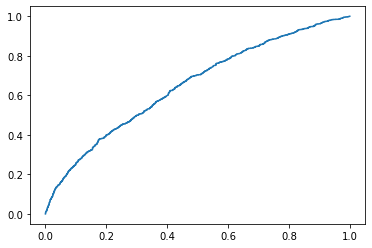

In [94]:
import matplotlib.pyplot as plt

plt.plot(tp,fp)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(sampling_strategy = "auto", random_state = 123)
x_train, y_train = ros.fit_sample(x_train, y_train)
Counter(y_train)